In [1]:
from numpy import array
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from autogluon.tabular import TabularPredictor as task
import numpy as np
import copy
from sklearn.preprocessing import RobustScaler


In [2]:
cols = [i for i in range(1,209)]
cols.extend(["time", "ground_truth"])
df = pd.DataFrame(columns = cols)

In [3]:
skip = [12, 15] 
for i in range(10,19):
    if i not in skip:
        df = pd.concat([df, read_csv("data/data_"+ str(i)+ "/final_dataset.csv", names = cols)])
#subs_df["time"] = final_df.time
df.drop(columns = "time", inplace = True)
df.drop(columns = list(range(53, 209)), inplace = True)
df

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,6.994544,6.994544,6.994544,6.994544,8.992985,8.992985,8.992985,8.992985,8.992985,7.993764,...,6.994544,7.993764,7.993764,7.993764,7.993764,6.994544,6.994544,6.994544,12.989867,18.903169
1,7.015450,6.013243,6.013243,6.013243,10.022071,10.022071,10.022071,10.022071,10.022071,9.019864,...,7.015450,7.015450,7.015450,8.017657,8.017657,7.015450,7.015450,7.015450,6.013243,19.028979
2,7.030526,6.026165,6.026165,6.026165,10.043608,10.043608,10.043608,10.043608,10.043608,9.039248,...,7.030526,7.030526,7.030526,8.034887,8.034887,7.030526,15.065413,8.034887,14.061052,18.992913
3,7.069335,7.069335,7.069335,7.069335,9.089145,12.118860,12.118860,12.118860,9.089145,9.089145,...,6.059430,6.059430,11.108955,11.108955,11.108955,12.118860,12.118860,12.118860,6.059430,19.011856
4,7.251873,7.251873,7.251873,7.251873,20.719637,12.431782,12.431782,11.395800,11.395800,6.215891,...,11.395800,11.395800,11.395800,11.395800,11.395800,11.395800,12.431782,12.431782,17.611691,18.977283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,10.994952,24.988527,7.996329,7.996329,8.995870,8.995870,9.995411,10.994952,10.994952,9.995411,...,6.996788,9.995411,14.993116,13.993575,12.994034,11.994493,11.994493,12.994034,11.994493,18.004161
221,8.019469,6.014602,8.019469,8.019469,8.019469,8.019469,8.019469,8.019469,9.021903,6.014602,...,6.014602,6.014602,14.034071,14.034071,12.029204,12.029204,12.029204,12.029204,12.029204,18.013564
222,7.992521,24.976629,6.993456,7.992521,7.992521,7.992521,7.992521,7.992521,7.992521,6.993456,...,6.993456,6.993456,7.992521,14.985977,7.992521,7.992521,7.992521,7.992521,7.992521,16.988184
223,8.012110,6.009082,6.009082,6.009082,6.009082,7.010596,7.010596,7.010596,8.012110,6.009082,...,6.009082,6.009082,16.024219,16.024219,8.012110,8.012110,8.012110,8.012110,8.012110,16.996759


In [4]:
print(df.shape)
scaler = RobustScaler()
scale_data = scaler.fit_transform(df)

(1575, 53)


In [5]:
df_scale = pd.DataFrame(scale_data, columns = df.columns)
df_scale

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,-0.418244,-0.384323,-0.313999,-0.303435,-0.141683,-0.053144,-0.003445,-0.140887,-0.142347,-0.146345,...,-0.428292,-0.192953,-0.164558,-0.202727,-0.198135,-0.325297,-0.333239,-0.287277,0.428215,0.553765
1,-0.415336,-0.507206,-0.457372,-0.443860,0.005535,0.112528,0.151848,0.005233,0.004891,0.000558,...,-0.425309,-0.332697,-0.304464,-0.199230,-0.194154,-0.321914,-0.329762,-0.284286,-0.567247,0.575066
2,-0.413239,-0.505588,-0.455484,-0.442011,0.008616,0.115996,0.155098,0.008291,0.007972,0.003333,...,-0.423158,-0.330544,-0.302308,-0.196707,-0.191283,-0.319475,1.009032,-0.138432,0.581057,0.568960
3,-0.407840,-0.374957,-0.303072,-0.292732,-0.127926,0.450091,0.468260,0.302954,-0.128589,0.010476,...,-0.561727,-0.469257,0.280938,0.253315,0.320928,0.503840,0.518989,0.445877,-0.560657,0.572167
4,-0.382448,-0.352099,-0.276402,-0.266611,1.535888,0.500468,0.515481,0.200288,0.201439,-0.400877,...,0.199737,0.292999,0.321959,0.295307,0.368723,0.386846,0.571031,0.490648,1.087681,0.566313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,0.138239,1.868963,-0.167634,-0.160078,-0.141270,-0.052680,0.147825,0.143371,0.144087,0.140223,...,-0.427972,0.092965,0.836403,0.675604,0.635026,0.483717,0.498305,0.571091,0.286190,0.401557
1571,-0.275670,-0.507036,-0.164253,-0.156767,-0.280950,-0.209871,-0.150352,-0.279115,-0.138209,-0.429695,...,-0.568123,-0.475660,0.699252,0.681532,0.474263,0.489333,0.504078,0.433049,0.291142,0.403149
1572,-0.279419,1.867473,-0.314158,-0.160623,-0.284805,-0.214209,-0.154418,-0.282942,-0.285489,-0.289556,...,-0.428447,-0.335839,-0.164736,0.820885,-0.198342,-0.163820,-0.167265,-0.144493,-0.284833,0.229545
1573,-0.276694,-0.507727,-0.457980,-0.444455,-0.568548,-0.372289,-0.302594,-0.422365,-0.282687,-0.430485,...,-0.568911,-0.476449,0.983858,0.972876,-0.195078,-0.160650,-0.164007,-0.141691,-0.282038,0.230997


In [6]:
df_scale_copy = df_scale.copy()
unscale_orig = scaler.inverse_transform(df_scale_copy)
df_unscale_orig = pd.DataFrame(unscale_orig, columns = df_scale_copy.columns)
df_unscale_orig

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,6.994544,6.994544,6.994544,6.994544,8.992985,8.992985,8.992985,8.992985,8.992985,7.993764,...,6.994544,7.993764,7.993764,7.993764,7.993764,6.994544,6.994544,6.994544,12.989867,18.903169
1,7.015450,6.013243,6.013243,6.013243,10.022071,10.022071,10.022071,10.022071,10.022071,9.019864,...,7.015450,7.015450,7.015450,8.017657,8.017657,7.015450,7.015450,7.015450,6.013243,19.028979
2,7.030526,6.026165,6.026165,6.026165,10.043608,10.043608,10.043608,10.043608,10.043608,9.039248,...,7.030526,7.030526,7.030526,8.034887,8.034887,7.030526,15.065413,8.034887,14.061052,18.992913
3,7.069335,7.069335,7.069335,7.069335,9.089145,12.118860,12.118860,12.118860,9.089145,9.089145,...,6.059430,6.059430,11.108955,11.108955,11.108955,12.118860,12.118860,12.118860,6.059430,19.011856
4,7.251873,7.251873,7.251873,7.251873,20.719637,12.431782,12.431782,11.395800,11.395800,6.215891,...,11.395800,11.395800,11.395800,11.395800,11.395800,11.395800,12.431782,12.431782,17.611691,18.977283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,10.994952,24.988527,7.996329,7.996329,8.995870,8.995870,9.995411,10.994952,10.994952,9.995411,...,6.996788,9.995411,14.993116,13.993575,12.994034,11.994493,11.994493,12.994034,11.994493,18.004161
1571,8.019469,6.014602,8.019469,8.019469,8.019469,8.019469,8.019469,8.019469,9.021903,6.014602,...,6.014602,6.014602,14.034071,14.034071,12.029204,12.029204,12.029204,12.029204,12.029204,18.013564
1572,7.992521,24.976629,6.993456,7.992521,7.992521,7.992521,7.992521,7.992521,7.992521,6.993456,...,6.993456,6.993456,7.992521,14.985977,7.992521,7.992521,7.992521,7.992521,7.992521,16.988184
1573,8.012110,6.009082,6.009082,6.009082,6.009082,7.010596,7.010596,7.010596,8.012110,6.009082,...,6.009082,6.009082,16.024219,16.024219,8.012110,8.012110,8.012110,8.012110,8.012110,16.996759


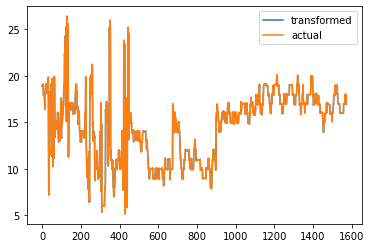

In [7]:
plt.plot(df_unscale_orig["ground_truth"].to_numpy(), label = "transformed")
plt.plot(df["ground_truth"].to_numpy(), label = "actual")
plt.legend()

In [8]:
def fit_model(train_dataset):
    metric = 'root_mean_squared_error'
    label_column = "ground_truth"
    print("train....")
    predictor = task(label=label_column, problem_type='regression', eval_metric=metric, path = "./autoresults").fit(train_data=train_dataset, presets = "best_quality",  verbosity = 2, time_limit = 3*60, auto_stack=True)
    return predictor
new_predict = fit_model(df_scale)

Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "./autoresults/"
AutoGluon Version:  0.3.1
Train Data Rows:    1575
Train Data Columns: 52
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3834.13 MB
	Train Data (Original)  Memory Usage: 0.66 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 52 | ['1', '2', '3', '4', '5', ...]
	Types of features in processed data (raw dtype, special dtypes

train....


AutoGluon will fit 2 stack levels (L1 to L2) ...
Fitting 11 L1 models ...
Fitting model: KNeighborsUnif_BAG_L1 ... Training model for up to 119.87s of the 179.84s of remaining time.
	-0.4694	 = Validation score   (root_mean_squared_error)
	0.01s	 = Training   runtime
	0.34s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ... Training model for up to 119.33s of the 179.31s of remaining time.
	-0.4571	 = Validation score   (root_mean_squared_error)
	0.01s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 118.95s of the 178.93s of remaining time.
/u/a/m/amondal5/.local/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, ear

In [9]:
#predictor = task.load("./wifiSensing-main/autoresults/")
new_predict.leaderboard()

                    model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2  -0.403130       0.453167   11.280331                0.000404           0.363609            2       True          5
1  RandomForestMSE_BAG_L1  -0.409257       0.234668   10.908212                0.234668          10.908212            1       True          4
2   KNeighborsDist_BAG_L1  -0.457051       0.218095    0.008511                0.218095           0.008511            1       True          2
3   KNeighborsUnif_BAG_L1  -0.469442       0.341226    0.014902                0.341226           0.014902            1       True          1
4         LightGBM_BAG_L1  -0.524751       0.167885  100.382388                0.167885         100.382388            1       True          3
5       LightGBMXT_BAG_L2  -0.547666       1.140295  156.946556                0.178421          45.632542            2       True          6
6     

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.403130,0.453167,11.280331,0.000404,0.363609,2,True,5
1,RandomForestMSE_BAG_L1,-0.409257,0.234668,10.908212,0.234668,10.908212,1,True,4
2,KNeighborsDist_BAG_L1,-0.457051,0.218095,0.008511,0.218095,0.008511,1,True,2
3,KNeighborsUnif_BAG_L1,-0.469442,0.341226,0.014902,0.341226,0.014902,1,True,1
4,LightGBM_BAG_L1,-0.524751,0.167885,100.382388,0.167885,100.382388,1,True,3
5,LightGBMXT_BAG_L2,-0.547666,1.140295,156.946556,0.178421,45.632542,2,True,6
6,WeightedEnsemble_L3,-0.547666,1.140709,156.947914,0.000414,0.001359,3,True,7


In [10]:
def forecast(predictor, input_x, model = None ):
    input_x_no_label = input_x.drop(columns = ["ground_truth"])
    prediction_sequence = predictor.predict(input_x_no_label, model = model).tolist()
    return prediction_sequence

In [22]:
cols = [i for i in range(1,209)]
cols.extend(["time", "ground_truth"])
test_df = pd.DataFrame(columns = cols)

skip = [15]
for i in skip:
    test_df = pd.concat([test_df, read_csv("data/data_"+ str(i)+ "/final_dataset.csv", names = cols)])

test_df.drop(columns = list(range(53, 209)), inplace = True)
    
test_df_time = test_df["time"].to_numpy()
actual_ground_truth = test_df["ground_truth"].to_numpy()
print(type(test_df_time), len(actual_ground_truth))
test_df.drop(columns = "time", inplace = True)
test_df

<class 'numpy.ndarray'> 225


,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,24.218154,24.218154,23.209064,6.054538,28.254513,10.090897,6.054538,6.054538,6.054538,6.054538,...,15.136346,14.127256,14.127256,14.127256,13.118167,8.072718,8.072718,8.072718,7.063628,14.985879
1,23.984612,23.984612,8.994230,8.994230,26.982689,10.992947,6.995512,9.993588,9.993588,9.993588,...,14.990383,13.991024,13.991024,7.994871,7.994871,7.994871,7.994871,7.994871,7.994871,13.889808
2,12.984604,12.984604,7.990525,7.990525,25.969207,7.990525,6.991710,6.991710,9.988157,9.988157,...,14.982235,14.982235,14.982235,14.982235,14.982235,14.982235,14.982235,14.982235,13.983419,13.008479
3,13.443470,13.443470,13.443470,6.204679,10.341131,8.272905,6.204679,6.204679,6.204679,6.204679,...,6.204679,6.204679,6.204679,6.204679,6.204679,11.375244,11.375244,11.375244,11.375244,14.524994
4,6.190908,6.190908,6.190908,6.190908,9.286362,8.254544,6.190908,6.190908,6.190908,6.190908,...,13.413635,13.413635,13.413635,13.413635,12.381817,12.381817,13.413635,12.381817,12.381817,14.782108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,7.985898,...,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.991772
221,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,7.999096,...,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,7.001062
222,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,7.000022,6.000019,11.000035,...,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.999671
223,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,11.020072,...,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.998837


In [23]:
scale_test = scaler.transform(test_df)
df_scale_test = pd.DataFrame(scale_test, columns = test_df.columns)
df_scale_test


,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,1.977673,1.772493,2.055021,-0.437951,2.613798,0.123609,-0.446866,-0.558115,-0.562769,-0.423977,...,0.733488,0.683165,0.712578,0.695174,0.655709,-0.150844,-0.153927,-0.133019,-0.417373,-0.109459
1,1.945186,1.743248,-0.021836,-0.017278,2.431856,0.268830,-0.304870,0.001188,0.000816,0.139962,...,0.712660,0.663705,0.693096,-0.202565,-0.197950,-0.163440,-0.166874,-0.144157,-0.284498,-0.295031
2,0.415013,0.365779,-0.168482,-0.160909,2.286871,-0.214530,-0.305444,-0.425046,0.000039,0.139184,...,0.711497,0.805292,0.834847,0.820337,0.966306,0.967147,0.995198,0.855550,0.569980,-0.444246
3,0.478844,0.423240,0.628220,-0.416465,0.051178,-0.169070,-0.424210,-0.536796,-0.541287,-0.402482,...,-0.541001,-0.448509,-0.420411,-0.464637,-0.496238,0.383520,0.395318,0.339485,0.197832,-0.187490
4,-0.530035,-0.484958,-0.431414,-0.418436,-0.099713,-0.172026,-0.426288,-0.538752,-0.543257,-0.404454,...,0.487669,0.581230,0.610525,0.590705,0.533016,0.546388,0.734323,0.483499,0.341455,-0.143958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-0.419201,-0.385185,-0.315005,-0.304420,-0.428557,-0.375982,-0.306055,-0.425621,-0.429261,-0.147472,...,-0.429274,-0.336667,-0.308438,-0.350014,-0.365775,-0.326411,-0.334384,-0.288262,-0.428212,-1.462916
221,-0.417595,-0.383739,-0.313318,-0.302767,-0.426905,-0.374122,-0.304312,-0.423982,-0.427609,-0.145582,...,-0.427627,-0.335017,-0.306787,-0.348323,-0.363851,-0.324542,-0.332463,-0.286610,-0.426564,-1.461343
222,-0.556589,-0.508862,-0.459304,-0.445752,-0.569845,-0.534982,-0.455094,-0.423866,-0.570569,0.284051,...,-0.570204,-0.477743,-0.449679,-0.494598,-0.530339,-0.486215,-0.498639,-0.429568,-0.569134,-1.461578
223,-0.555068,-0.507493,-0.457707,-0.444188,-0.568281,-0.533223,-0.453444,-0.564304,-0.569005,0.286920,...,-0.568645,-0.476182,-0.448116,-0.492998,-0.528518,-0.484447,-0.496821,-0.428004,-0.567575,-1.461720


In [24]:
df_scale_test_copy = df_scale_test.copy()
unscale_test_orig = scaler.inverse_transform(df_scale_test_copy)
df_unscale_test_orig = pd.DataFrame(unscale_test_orig, columns = df_scale_test_copy.columns)
df_unscale_test_orig

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,24.218154,24.218154,23.209064,6.054538,28.254513,10.090897,6.054538,6.054538,6.054538,6.054538,...,15.136346,14.127256,14.127256,14.127256,13.118167,8.072718,8.072718,8.072718,7.063628,14.985879
1,23.984612,23.984612,8.994230,8.994230,26.982689,10.992947,6.995512,9.993588,9.993588,9.993588,...,14.990383,13.991024,13.991024,7.994871,7.994871,7.994871,7.994871,7.994871,7.994871,13.889808
2,12.984604,12.984604,7.990525,7.990525,25.969207,7.990525,6.991710,6.991710,9.988157,9.988157,...,14.982235,14.982235,14.982235,14.982235,14.982235,14.982235,14.982235,14.982235,13.983419,13.008479
3,13.443470,13.443470,13.443470,6.204679,10.341131,8.272905,6.204679,6.204679,6.204679,6.204679,...,6.204679,6.204679,6.204679,6.204679,6.204679,11.375244,11.375244,11.375244,11.375244,14.524994
4,6.190908,6.190908,6.190908,6.190908,9.286362,8.254544,6.190908,6.190908,6.190908,6.190908,...,13.413635,13.413635,13.413635,13.413635,12.381817,12.381817,13.413635,12.381817,12.381817,14.782108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,7.985898,...,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.991772
221,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,7.999096,...,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,7.001062
222,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,7.000022,6.000019,11.000035,...,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.999671
223,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,11.020072,...,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.998837


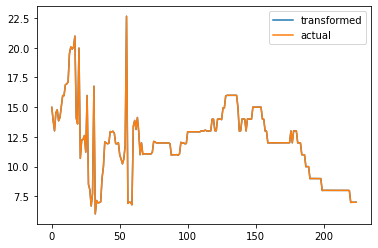

In [25]:
plt.plot(df_unscale_test_orig["ground_truth"].to_numpy(), label = "transformed")
plt.plot(test_df["ground_truth"].to_numpy(), label = "actual")
plt.legend()

In [26]:
output = forecast(new_predict, df_scale_test)
#output

In [27]:
print(output[:2])

[-0.06582439690828323, 0.01932452619075775]


In [28]:
df_scale_test["ground_truth"] = output
df_scale_test

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,1.977673,1.772493,2.055021,-0.437951,2.613798,0.123609,-0.446866,-0.558115,-0.562769,-0.423977,...,0.733488,0.683165,0.712578,0.695174,0.655709,-0.150844,-0.153927,-0.133019,-0.417373,-0.065824
1,1.945186,1.743248,-0.021836,-0.017278,2.431856,0.268830,-0.304870,0.001188,0.000816,0.139962,...,0.712660,0.663705,0.693096,-0.202565,-0.197950,-0.163440,-0.166874,-0.144157,-0.284498,0.019325
2,0.415013,0.365779,-0.168482,-0.160909,2.286871,-0.214530,-0.305444,-0.425046,0.000039,0.139184,...,0.711497,0.805292,0.834847,0.820337,0.966306,0.967147,0.995198,0.855550,0.569980,-0.021565
3,0.478844,0.423240,0.628220,-0.416465,0.051178,-0.169070,-0.424210,-0.536796,-0.541287,-0.402482,...,-0.541001,-0.448509,-0.420411,-0.464637,-0.496238,0.383520,0.395318,0.339485,0.197832,-0.166535
4,-0.530035,-0.484958,-0.431414,-0.418436,-0.099713,-0.172026,-0.426288,-0.538752,-0.543257,-0.404454,...,0.487669,0.581230,0.610525,0.590705,0.533016,0.546388,0.734323,0.483499,0.341455,-0.320013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-0.419201,-0.385185,-0.315005,-0.304420,-0.428557,-0.375982,-0.306055,-0.425621,-0.429261,-0.147472,...,-0.429274,-0.336667,-0.308438,-0.350014,-0.365775,-0.326411,-0.334384,-0.288262,-0.428212,-0.955792
221,-0.417595,-0.383739,-0.313318,-0.302767,-0.426905,-0.374122,-0.304312,-0.423982,-0.427609,-0.145582,...,-0.427627,-0.335017,-0.306787,-0.348323,-0.363851,-0.324542,-0.332463,-0.286610,-0.426564,-0.914204
222,-0.556589,-0.508862,-0.459304,-0.445752,-0.569845,-0.534982,-0.455094,-0.423866,-0.570569,0.284051,...,-0.570204,-0.477743,-0.449679,-0.494598,-0.530339,-0.486215,-0.498639,-0.429568,-0.569134,-0.624440
223,-0.555068,-0.507493,-0.457707,-0.444188,-0.568281,-0.533223,-0.453444,-0.564304,-0.569005,0.286920,...,-0.568645,-0.476182,-0.448116,-0.492998,-0.528518,-0.484447,-0.496821,-0.428004,-0.567575,-0.790285


In [29]:
unscale_test = scaler.inverse_transform(df_scale_test)
df_unscale_test = pd.DataFrame(unscale_test, columns = df_scale_test.columns)
df_unscale_test

,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,ground_truth
0,24.218154,24.218154,23.209064,6.054538,28.254513,10.090897,6.054538,6.054538,6.054538,6.054538,...,15.136346,14.127256,14.127256,14.127256,13.118167,8.072718,8.072718,8.072718,7.063628,15.243601
1,23.984612,23.984612,8.994230,8.994230,26.982689,10.992947,6.995512,9.993588,9.993588,9.993588,...,14.990383,13.991024,13.991024,7.994871,7.994871,7.994871,7.994871,7.994871,7.994871,15.746528
2,12.984604,12.984604,7.990525,7.990525,25.969207,7.990525,6.991710,6.991710,9.988157,9.988157,...,14.982235,14.982235,14.982235,14.982235,14.982235,14.982235,14.982235,14.982235,13.983419,15.505016
3,13.443470,13.443470,13.443470,6.204679,10.341131,8.272905,6.204679,6.204679,6.204679,6.204679,...,6.204679,6.204679,6.204679,6.204679,6.204679,11.375244,11.375244,11.375244,11.375244,14.648761
4,6.190908,6.190908,6.190908,6.190908,9.286362,8.254544,6.190908,6.190908,6.190908,6.190908,...,13.413635,13.413635,13.413635,13.413635,12.381817,12.381817,13.413635,12.381817,12.381817,13.742254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,7.985898,...,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,6.987660,9.987065
221,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,7.999096,...,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,6.999209,10.232700
222,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,7.000022,6.000019,11.000035,...,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,6.000019,11.944173
223,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,11.020072,...,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,6.010948,10.964623


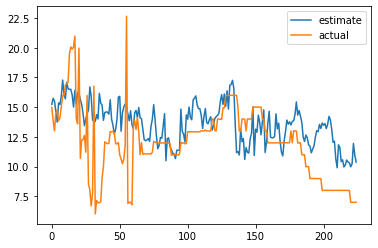

In [30]:
plt.plot(df_unscale_test["ground_truth"].to_numpy(), label = "estimate")
plt.plot(df_unscale_test_orig["ground_truth"].to_numpy(), label = "actual")
plt.legend()

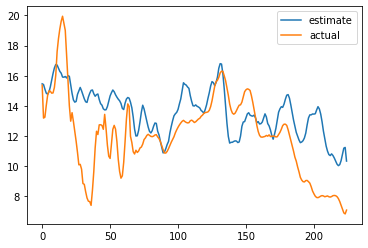

In [32]:
from scipy.signal import savgol_filter
smooth_estimate = savgol_filter(df_unscale_test["ground_truth"], 21, 6) # window size 51, polynomial order 3
smooth_ground = savgol_filter(df_unscale_test_orig["ground_truth"], 21, 6) # window size 51, polynomial order 3
plt.plot(smooth_estimate, label = "estimate")
plt.plot(smooth_ground, label = "actual")
plt.legend()

In [31]:
new_predict.leaderboard(data = df_scale_test_copy)

                    model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   -0.499642  -0.395986        1.185788       2.446410  40.032805                 0.002329                0.000409           1.072142            2       True          5
1    ExtraTreesMSE_BAG_L1   -0.501431  -0.397730        0.495981       0.849427   7.540972                 0.495981                0.849427           7.540972            1       True          4
2  RandomForestMSE_BAG_L1   -0.521178  -0.409257        0.492911       1.213123  31.346754                 0.492911                1.213123          31.346754            1       True          3
3  RandomForestMSE_BAG_L2   -0.530352  -0.355014        1.746644       4.031597  71.447235                 0.422888                1.090597          32.431057            2       True          6
4     WeightedEnsemble_L3   -0

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.499642,-0.395986,1.185788,2.446410,40.032805,0.002329,0.000409,1.072142,2,True,5
1,ExtraTreesMSE_BAG_L1,-0.501431,-0.397730,0.495981,0.849427,7.540972,0.495981,0.849427,7.540972,1,True,4
2,RandomForestMSE_BAG_L1,-0.521178,-0.409257,0.492911,1.213123,31.346754,0.492911,1.213123,31.346754,1,True,3
3,RandomForestMSE_BAG_L2,-0.530352,-0.355014,1.746644,4.031597,71.447235,0.422888,1.090597,32.431057,2,True,6
4,WeightedEnsemble_L3,-0.530352,-0.355014,1.747817,4.031996,71.448647,0.001173,0.000399,0.001412,3,True,7
5,KNeighborsUnif_BAG_L1,-0.553978,-0.469442,0.140297,0.494999,0.055515,0.140297,0.494999,0.055515,1,True,1
6,KNeighborsDist_BAG_L1,-0.555404,-0.457051,0.194567,0.383451,0.072936,0.194567,0.383451,0.072936,1,True,2


In [4]:
plt.plot(output, label = "estimate")
plt.plot(subs_17.ground_truth, label ="actual")
plt.legend()

NameError: name 'output' is not defined

In [32]:
#predictor